In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

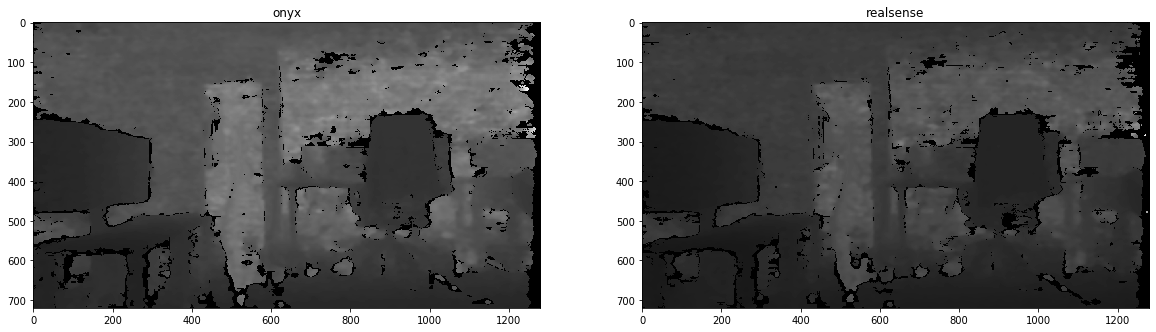

In [24]:
onyx_depth = cv2.imread('comparison_data/onyx_depth.png', cv2.IMREAD_ANYDEPTH).astype(np.float32)
rs_depth = cv2.imread('comparison_data/rs_depth.png', cv2.IMREAD_ANYDEPTH).astype(np.float32)

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('onyx')
ax1.imshow(onyx_depth, cmap='gray')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('realsense')
ax2.imshow(rs_depth, cmap='gray')

In [25]:
onyx_mean = np.mean(onyx_depth.ravel())
onyx_std = np.std(onyx_depth.ravel())

print('ONYX: mean={}    std={}\n'.format(onyx_mean, onyx_std))

rs_mean = np.mean(rs_depth.ravel())
rs_std = np.std(rs_depth.ravel())

print('REALSENSE: mean={}    std={}\n'.format(rs_mean, rs_std))

ONYX: mean=2841.693115234375    std=1293.4061279296875

REALSENSE: mean=2813.793701171875    std=1286.862060546875



Number of bins:  65536


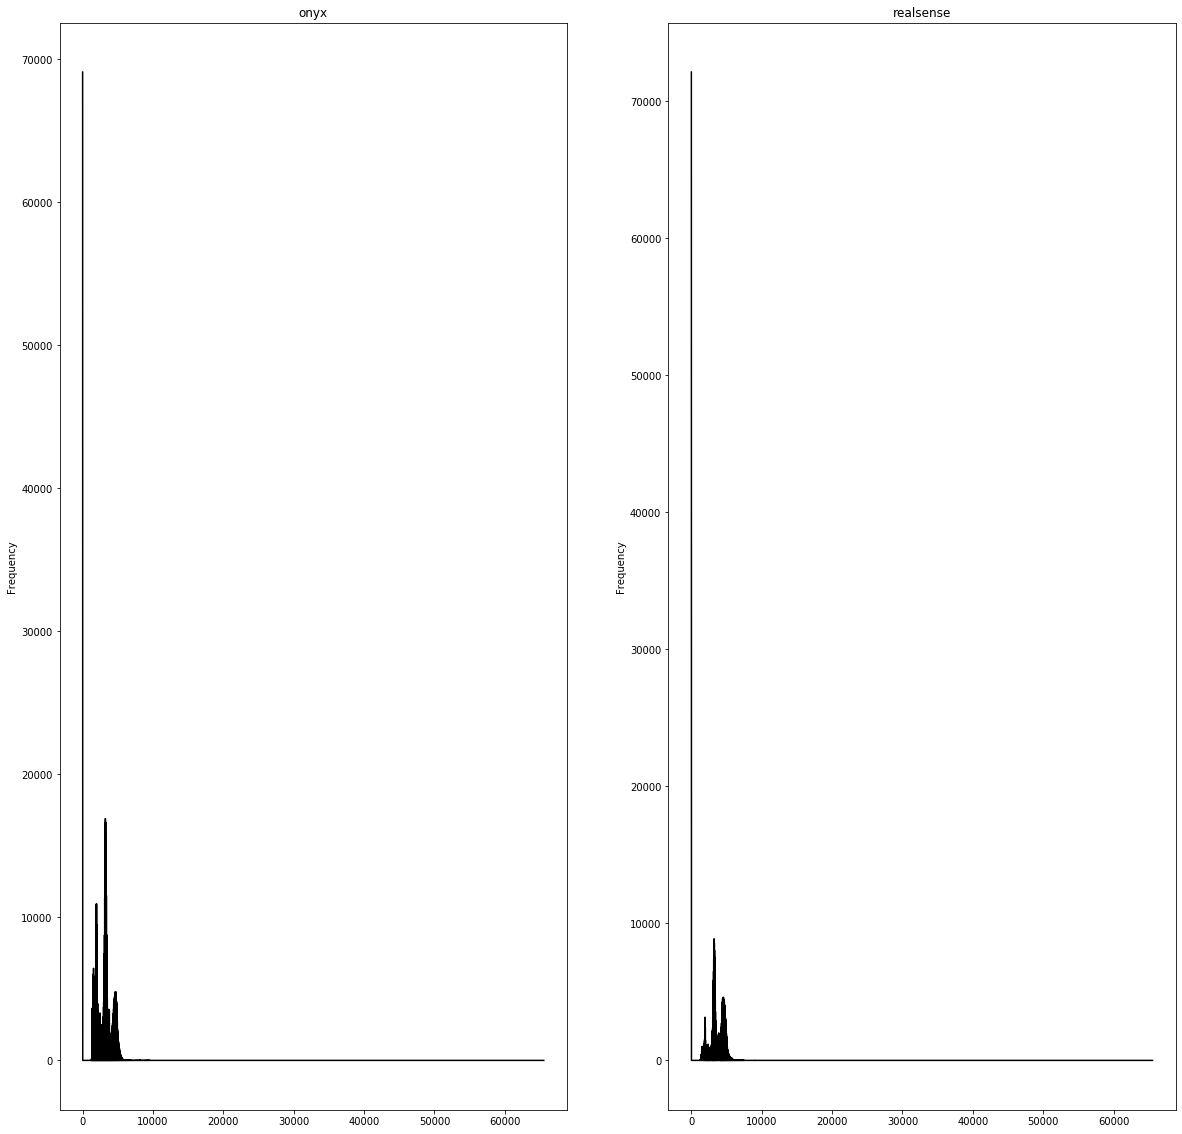

In [29]:
nbins = np.power(2, 16)
print('Number of bins: ', nbins)

onyx_hist, onyx_bins = np.histogram(onyx_depth.ravel(), nbins, [0, nbins])

rs_hist, rs_bins = np.histogram(rs_depth.ravel(), nbins, [0, nbins])

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('onyx')
ax1.set_ylabel('Frequency')
ax1.plot(onyx_hist, color='black')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('realsense')
ax2.set_ylabel('Frequency')
ax2.plot(rs_hist, color='black')